### Histgram関数の理解

Matplotlib, numpy

1. [matplotlibでヒストグラムの縦軸を相対度数（柱の高さの合計=1）や相対度数密度（ヒストグラム全体の面積=1）にする](https://qiita.com/kanedaq/items/1e7a0e52363224c08980)

2. [NumPyでヒストグラムを作るnp.histogram関数の使い方](https://deepage.net/features/numpy-histogram.html)
3. [pandasで度数分布表を自動で作る関数](https://www.self-study-blog.com/dokugaku/python-pandas-numpy-frequency-table/)


ヒストグラムの用語

- 階級:：度数を集計するための 1つ1つ区間
- 階級数 : 階級の数
- 階級幅 : 区間の大きさを階級の幅
- 階級値 : その階級を代表する値（階級の真ん中の値）
  
  
- 度数 (Frequency)
- 相対度数 (Relative Frequency)
  
-> 相対度数 = 度数 /　度数の合計値

- 相対度数密度　(Density = relative frequency density)
 
-> 相対度数密度 = 相対度数 / 階級幅

ちなみに    
- 度数密度 (frequency density)
- 
-> 度数密度 = 度数 / 階級幅


Histgramは、numpyで計算してからplotする方法と、matplotlibで直接Plotの方法がある。
（Matplotlibでも内部でnumpyを用いている）

matplotlibによるヒストグラムの作図は文献1が参考になります。
ここでは、文献1に従いnumpyでの計算についての覚えです。


In [20]:
import matplotlib.pyplot as plt
import numpy as np

Data length: (10000,), 10000


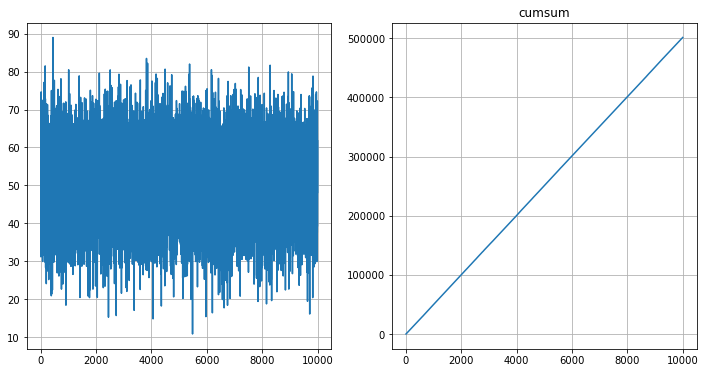

In [21]:
# dataの作成
mu = 50
sg = 10
data = np.array([ np.random.normal(mu, sg) for i in range(10000) ])

print(f'Data length: {data.shape}, {len(data)}')

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(data)
plt.grid()

plt.subplot(1,2,2)
plt.plot(data.cumsum())
plt.title("cumsum")
plt.grid()

Frequency example
Bin width: 0.782
Bins length:101
Histgram length: 100
Max cumsum: 10000.00
Area: 7821.15


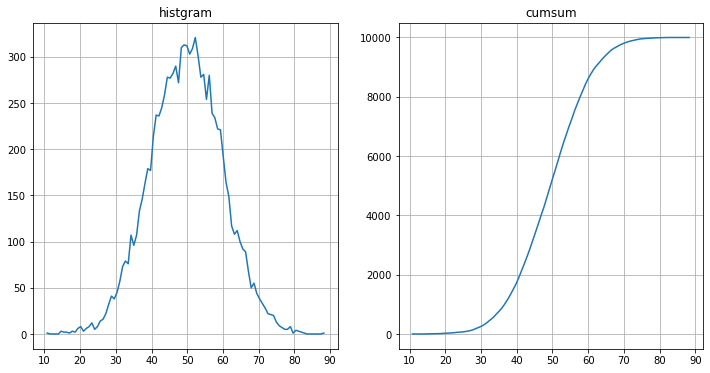

In [22]:
# Frequency example
print('Frequency example')

# Bins (階級数)
num_bins = 100

# Bins width　(階級幅)
bin_width = (max(data) - min(data)) / num_bins
print(f"Bin width: {bin_width:.3f}")

hist, bins = np.histogram(data, bins=num_bins) 

print(f'Bins length:{len(bins)}')
# binsの長さに注意
# binsには階級の上限と下限が含まれるのでhistよりも長さが1つだけ大きな数が帰ってきます。num_bins+1

print(f'Histgram length: {len(hist)}')
print(f'Max cumsum: {hist.cumsum().max():.2f}')
print(f'Area: {np.sum(bin_width*hist):.2f}')

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("histgram")
plt.plot(bins[:-1],hist)
plt.grid()

plt.subplot(1,2,2)
plt.plot(bins[:-1],hist.cumsum())
plt.title("cumsum")
plt.grid()


Relative Frequency example
Bin width: 0.782
weight length:10000
bins length:101
histgram length: 100
Max cumsum: 1.00
Area: 0.78


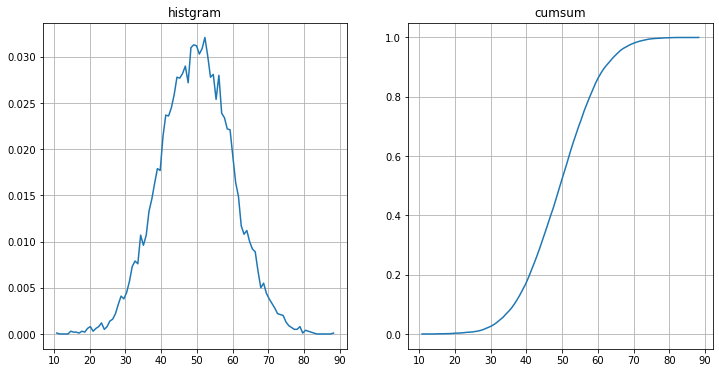

In [23]:
# Relative Frequency example
print('Relative Frequency example')

# Bins
num_bins = 100

# Bins width
bin_width = (max(data) - min(data)) / num_bins
print(f"Bin width: {bin_width:.3f}")

# weightsを指定することで各階級の重み付けを行う
weights = np.ones_like(data) / len(data)

print(f'weight length:{len(weights)}')

hist, bins = np.histogram(data, bins=num_bins, weights=weights) 

print(f'bins length:{len(bins)}')
print(f'histgram length: {len(hist)}')
print(f'Max cumsum: {hist.cumsum().max():.2f}')
print(f'Area: {np.sum(bin_width*hist):.2f}')
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("histgram")
plt.plot(bins[:-1],hist)
plt.grid()

plt.subplot(1,2,2)
plt.plot(bins[:-1],hist.cumsum())
plt.title("cumsum")
plt.grid()

# Note:
# 度数分布を求めて、度数累積和の最大値で規格化しても同じ
# hist, bins = np.histogram(data, bins=num_bins) 

# plt.figure(figsize=(12, 6))
# plt.subplot(1,2,1)
# plt.title("histgram")
# plt.plot(bins[:-1],hist/(max(hist.cumsum())))
# plt.grid()

# plt.subplot(1,2,2)
# plt.plot(bins[:-1],hist.cumsum()/(max(hist.cumsum())))
# plt.title("cumsum")
# plt.grid()

In [24]:
# 累積和で50%の位置の階級値を求めたい場合

def getNearestValue(list, num):
    """
    リストからある値に最も近い値を返却する関数
    Args:
        list (list or ndarray): 探索対象データ
        num (float): 対象値

    Returns:
        float:  対象値に最も近い値
    """
    # リスト要素と対象値の差分を計算し最小値のインデックスを取得
    idx = np.abs(np.asarray(list) - num).argmin()
    
    return idx


ind = getNearestValue(hist.cumsum(), 0.5)

print(f'Index :{ind}')
print(f'Bin : {bins[ind]}')


Index :49
Bin : 49.12474250354667


Density (relative frequency density) example
Bin width : 0.782
weight length : 10000
bins length : 101
histgram length : 100
Max cumsum : 1.28
Area: 1.00


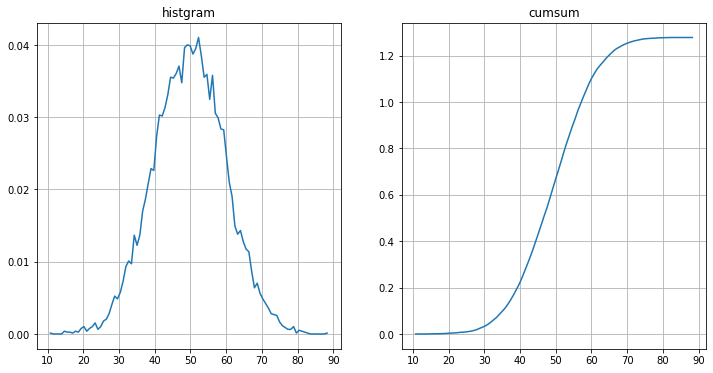

In [25]:
# Density example

# Density (relative frequency density)
# -> Relative frequency density ->  relative frequency / bin_width

print('Density (relative frequency density) example')

# Bins
num_bins = 100

# Bins width
bin_width = (max(data) - min(data)) / num_bins
print(f"Bin width : {bin_width:.3f}")

weights = np.ones_like(data) / len(data)
print(f'weight length : {len(weights)}')


hist, bins = np.histogram(data, bins=num_bins, weights=weights, density=True) 

# weightsを指定しなくて同じ結果になる
# hist, bins = np.histogram(data, bins=num_bins, density=True) 

print(f'bins length : {len(bins)}')
print(f'histgram length : {len(hist)}')
print(f'Max cumsum : {hist.cumsum().max():.2f}')

# density = True :ヒストグラム全体の面積が1になる。
print(f'Area: {np.sum(bin_width*hist):.2f}')
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("histgram")
plt.plot(bins[:-1],hist)
plt.grid()

plt.subplot(1,2,2)
plt.plot(bins[:-1],hist.cumsum())
plt.title("cumsum")
plt.grid()

Range change  -Relative Frequency example- 
Bin width: 0.300
weight length:10000
bins length : 101
histgram length : 100
Max cumsum : 0.82
Area : 0.25


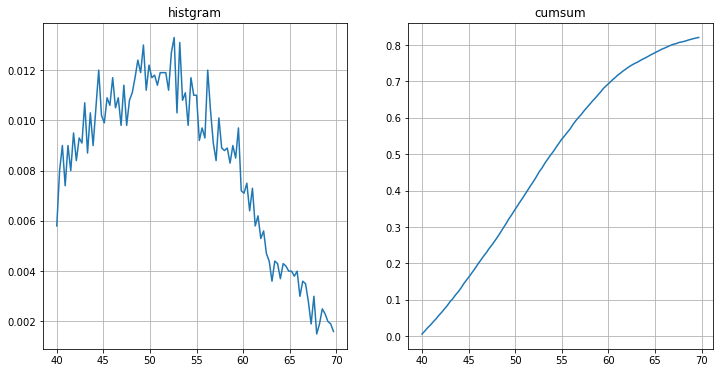

In [26]:
# Relative Frequency example. Range change

print('Range change  -Relative Frequency example- ')

# Bins
num_bins = 100

# Bins width
# bin_range =(min(data),max(data))
bin_range=(40,70)

bin_width = (max(bin_range) - min(bin_range)) / num_bins
print(f"Bin width: {bin_width:.3f}")

# weightsを指定することで各階級の重み付けを行う
weights = np.ones_like(data) / len(data)

print(f'weight length:{len(weights)}')

hist, bins = np.histogram(data, bins=num_bins, range=bin_range, weights=weights) 

print(f'bins length : {len(bins)}')
print(f'histgram length : {len(hist)}')
print(f'Max cumsum : {hist.cumsum().max():.2f}')
print(f'Area : {np.sum(bin_width*hist):.2f}')
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("histgram")
plt.plot(bins[:-1],hist)
plt.grid()

plt.subplot(1,2,2)
plt.plot(bins[:-1],hist.cumsum())
plt.title("cumsum")
plt.grid()


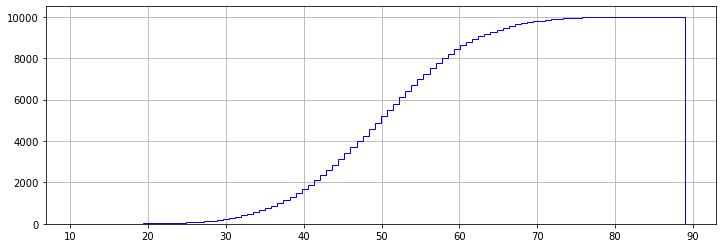

In [27]:
# 余談　MatplotlibのHistでも累積和を求めることができます。

fig, ax = plt.subplots(figsize=(12,4))

n,bins,patches = ax.hist(data, bins=num_bins,
                         cumulative=True, # 累積和
                         histtype='step', # 階段状、塗りつぶしなし
                         color='blue'
                        )
ax.grid(True)
plt.show()

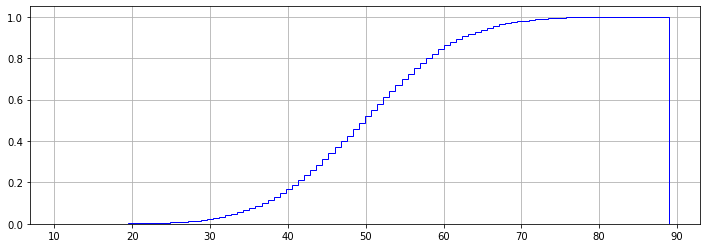

In [28]:
fig, ax = plt.subplots(figsize=(12,4))

n,bins,patches = ax.hist(data, bins=num_bins, weights=weights,
                         cumulative=True, # 累積和
                         histtype='step', # 階段状、塗りつぶしなし
                         color='blue'
                        )
ax.grid(True)
plt.show()

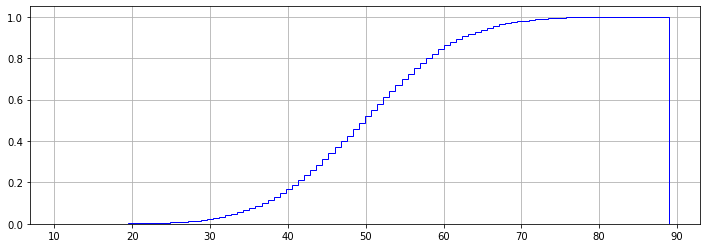

In [29]:
# 注意　density =True　にしても結果が同じになってまう。
fig, ax = plt.subplots(figsize=(12,4))

n,bins,patches = ax.hist(data, bins=num_bins, 
                         density=True,
                         cumulative=True, # 累積和
                         histtype='step', # 階段状、塗りつぶしなし
                         color='blue'
                        )
ax.grid(True)
plt.show()